<a href="https://colab.research.google.com/github/NanyGit/Mediana-compra-predicci-n/blob/main/Amanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerias
import numpy as np
import pandas as pd
import datetime

In [ ]:
#librerias para graficar
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline


In [ ]:
#importamos de las librerias las funciones necesarias e importamos un modelo de prediccion llamado skforecast 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import warnings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.3 MB/s 
     |████████████████████████████████| 348 kB 43.9 MB/s 
     |████████████████████████████████| 100 kB 8.7 MB/s 
     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 210 kB 43.7 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 147 kB 45.0 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 112 kB 53.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=7565fda0e2d9c44a1d3367ddc327defc53577989cbc69038ee5a40f491c56bd0
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 

In [ ]:
df=pd.read_excel("/content/DOC-20221125-WA0066.xlsx", index_col=0, 
                 parse_dates=True,names=['Fecha','Ofertas_Compra','Ofertas_Venta','Mínimo','Máximo','Promedio','Mediana','Mediana_Compra','Mediana_Venta','Moda','Moda_Frecuencia'])

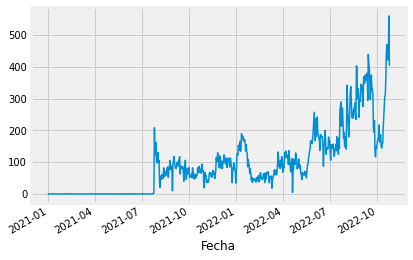

In [ ]:
df['Ofertas_Compra'].plot()

In [ ]:
df[(df.index>datetime.datetime(2021,7,1)) & (df.index<datetime.datetime(2021,8,1))]['Ofertas_Compra']

Fecha
2021-07-31     98
2021-07-30    110
2021-07-29    162
2021-07-28    123
2021-07-27    130
2021-07-26    208
2021-07-25      6
2021-07-24      1
2021-07-23      1
2021-07-22      0
2021-07-21      0
2021-07-20      0
2021-07-19      0
2021-07-18      0
2021-07-17      0
2021-07-16      0
2021-07-15      0
2021-07-14      0
2021-07-13      0
2021-07-12      0
2021-07-11      0
2021-07-10      0
2021-07-09      0
2021-07-08      0
2021-07-07      0
2021-07-06      0
2021-07-05      1
2021-07-04      0
2021-07-03      0
2021-07-02      0
Name: Ofertas_Compra, dtype: int64

In [ ]:
df=df[df.index>datetime.datetime(2021,7,25)]


In [ ]:
df.sort_index(inplace=True)
df

,Ofertas_Compra,Ofertas_Venta,Mínimo,Máximo,Promedio,Mediana,Mediana_Compra,Mediana_Venta,Moda,Moda_Frecuencia
Fecha,,,,,,,,,,
2021-07-26,208,199,50.0,65.0,59.77,60.0,60.0,61.0,60.0,156
2021-07-27,130,329,48.0,68.0,59.19,60.0,59.5,60.0,60.0,150
2021-07-28,123,300,48.0,70.0,59.36,60.0,59.0,60.0,60.0,140
2021-07-29,162,333,29.0,67.0,59.66,60.0,59.0,60.5,60.0,157
2021-07-30,110,325,50.0,68.0,59.61,60.0,59.0,60.0,60.0,161
...,...,...,...,...,...,...,...,...,...,...
2022-10-21,468,1434,140.0,200.0,173.39,175.0,168.0,175.0,175.0,513
2022-10-22,421,1272,140.0,200.0,170.94,170.0,165.0,173.0,170.0,540
2022-10-23,432,1180,150.0,200.0,168.10,170.0,160.0,170.0,170.0,488


Fechas train : 2021-07-26 00:00:00 --- 2022-10-05 00:00:00  (n=437)
Fechas test  : 2022-10-06 00:00:00 --- 2022-10-25 00:00:00  (n=20)


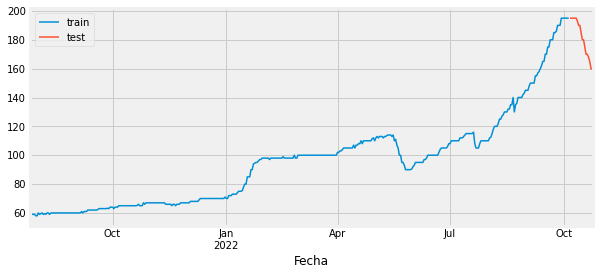

In [ ]:
steps = 20
datos_train = df[:-steps]
datos_test  = df[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train['Mediana_Compra'].plot(ax=ax, label='train')
datos_test['Mediana_Compra'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
forecaster = ForecasterAutoreg(regressor = RandomForestRegressor(random_state=123),lags = 6)

forecaster.fit(y=datos_train['Mediana_Compra'])
forecaster

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Transformer for y: None 
Transformer for exog: None 
Window size: 6 
Weight function included: False 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 436] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-12-18 00:49:08 
Last fit date: 2022-12-18 00:49:09 
Skforecast version: 0.6.0 
Python version: 3.8.16 

In [ ]:
predicciones = forecaster.predict(steps=steps)
predicciones.index=datos_test.index


/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
error_mse = mean_squared_error(
                y_true = datos_test['Mediana_Compra'],
                y_pred = predicciones
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 376.4824999999996


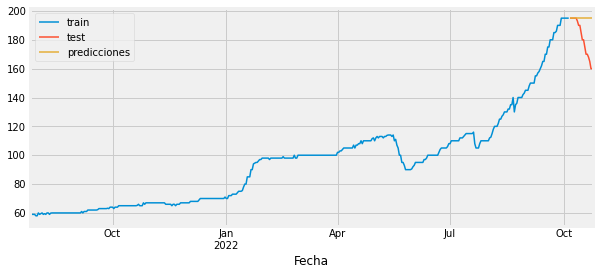

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['Mediana_Compra'].plot(ax=ax, label='train')
datos_test['Mediana_Compra'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend()


In [ ]:
steps = 20
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # Este valor será remplazado en el grid search
             )

# Lags utilizados como predictores
lags_grid = [10, 20]

# Hiperparámetros del regresor
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

resultados_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = datos_train['Mediana_Compra'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(datos_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                        
                  )

Number of models compared: 12.


loop param_grid:   0%|                                              | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but n

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
  Parameters: {'max_depth': 5, 'n_estimators': 100}
  Backtesting metric: 131.68013585516053



/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
resultados_grid

,lags,params,mean_squared_error,max_depth,n_estimators
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 100}",131.680136,5,100
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 100}",135.109966,10,100
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 10, 'n_estimators': 500}",136.657014,10,500
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 500}",141.559078,10,500
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 5, 'n_estimators': 500}",141.671177,5,500
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 500}",145.583293,5,500
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 5, 'n_estimators': 100}",145.605128,5,100
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","{'max_depth': 10, 'n_estimators': 100}",151.794945,10,100
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 500}",209.550321,3,500
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'max_depth': 3, 'n_estimators': 100}",209.600523,3,100


In [ ]:
regressor = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=datos_train['Mediana_Compra'])
prediccion = forecaster.predict(steps=steps)

/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:522: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/skforecast/utils/utils.py:579: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:

error_mse = mean_squared_error(
                y_true = datos_test['Mediana_Compra'],
                y_pred = prediccion
            )

print(f"Error de test (mse): {error_mse}")

Error de test (mse): 375.82607461734733


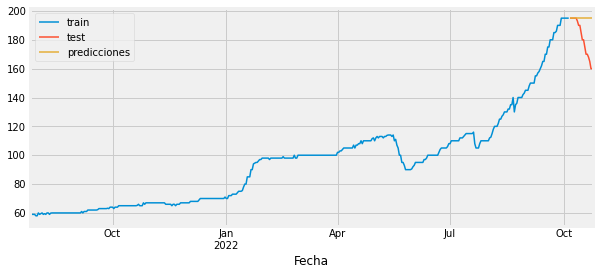

In [ ]:
predicciones.index=datos_test.index
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['Mediana_Compra'].plot(ax=ax, label='train')
datos_test['Mediana_Compra'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();